# Odwzorowanie logistyczne i wykres bifurkacyjny

### Wstęp

Celem projektu jest analiza zachowania prostego modelu matematycznego - odzworowania logistycznego. Model ten opisuje zmiany wartości pewnej wielkości w kolejnych krokach czasu i zależy od jednego parametru. Dodatkowo w projekcie pokazano, że wraz ze zmianą parametru model może przechodzić od stabilnego zachowania, przez regularne oscylacje, aż do chaosu.

Odwzorowanie logistyczne zostało zaproponowane w latach 70. XX wieku w kontekście badań nad dynamiką populacji, jednak szybko okazało się, że mimo bardzo prostej postaci może prowadzić do złożonych zachowań. Stało się ono jednym z klasycznych przykładów używanych w badaniach układów nieliniowych i chaosu deterministycznego.

### Kluczowe pojęcia

1. **Odwzorowanie logistyczne** - to prosty model matematyczny opisujący,
jak pewna wielkość zmienia się w kolejnych krokach czasu w zależności
od aktualnej wartości oraz jednego parametru. Mimo nieskomplikowanej
postaci, model ten może wykazywać bardzo zróżnicowane zachowanie
dynamiczne.

2. **Chaos deterministyczny** - to rodzaj zachowania układu, w którym niewielkie
różnice w warunkach początkowych prowadzą do bardzo dużych różnic
w dalszym przebiegu ewolucji układu. Choć układ opisany jest
ściśle określonymi równaniami, jego zachowanie staje się trudne
do przewidzenia w długim czasie.

3. **Wykres bifurkacyjny** - przedstawia długookresowe zachowanie układu
w zależności od wartości parametru. Pozwala on zobaczyć, jak wraz
ze zmianą parametru układ przechodzi od stabilnego zachowania,
przez okresowość, aż do chaosu.

## Definicja i interpretacja odwzorowania logistycznego

Odwzorowanie logistyczne jest dyskretnym układem dynamicznym, który opisuje
zmianę wartości $x_n$ w kolejnych krokach czasu zgodnie z równaniem:

$$
x_{n+1} = k \, x_n \, (1 - x_n)
$$

Funkcja ta jest klasycznym przykładem prostego układu dynamicznego zachowującego się chaotycznie.

### Odwzorowanie logistyczne w kontekście modelowania populacji

Odwzorowanie logistyczne znajduje zastosowanie np. w badaniach dynamiki liczebności populacji.

W kontekście modelowania populacji:
- $x_n = N_n / K$, gdzie $N_n$ oznacza liczebność populacji w $n$-tym kroku czasu, a $K$ to pojemność środowiska (maksymalna liczba osobników, jaką środowisko może utrzymać). Dzięki temu $x_n \in [0,1]$.
- Parametr $k \in (0,4]$ kontroluje tempo wzrostu populacji, odpowiadając w pewnym sensie za wskaźnik reprodukcji.

Interpretacja parametrów:
- Dla małych wartości $k$ populacja stabilizuje się na stałym poziomie.
- Wraz ze wzrostem $k$ mogą pojawiać się regularne oscylacje (okresowość).
- Dla dużych wartości $k$ zachowanie układu staje się nieregularne i chaotyczne.

Czynnik $(1 - x_n)$ odpowiada za ograniczenie wzrostu wynikające z konkurencji
o zasoby (np. pożywienie, terytorium), dzięki czemu populacja nie przekracza
dostępnej pojemności środowiska $K$.

### Potrzebne importy i wzór odwzorowania logistycznego

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

In [7]:
def logistic_map(x, k):
    """
    Funkcja odwzorowania logistycznego
    Parametry:
       x - bieżąca wartość zmiennej
       k - parametr wzrostu, kontrolujący dynamikę układu
    """
    return k * x * (1 - x)


### Ciąg iteracji dla odwzorowania logistycznego

In [8]:
def generate_trajectory(k, x0, n_iters=100):
    """
    Funkcja generuje ciąg kolejnych wartości odwzorowania logistycznego.
    Parametry:
        k - parametr wzrostu, kontrolujący dynamikę układu
        x0 - warunek początkowy
        n_iters - liczba iteracji do wygenerowania ciągu wartości
    """
    x = np.zeros(n_iters)
    x[0] = x0
    
    for i in range(1, n_iters):
        x[i] = logistic_map(x[i-1], k)
    
    return x


### Wizualizacja ciągów iteracji dla różnych parametrów k

In [4]:
def plot_trajectories_for_k(k_values, x0=0.2, n_iters=100):
    """
    Funkcja rysuje ciągi kolejnych wartości dla odwzorowania logistycznego dla wielu wartości parametru k.
    Parametry:
        k_values - tablica wartości parametru k
        x0 - warunek początkowy dla wszystkich trajektorii
        n_iters - liczba iteracji
    """
    fig, axes = plt.subplots(len(k_values), 1, figsize=(8, 3 * len(k_values)), sharex=True)
    
    if len(k_values) == 1:
        axes = [axes]
    
    for ax, k in zip(axes, k_values):
        x = generate_trajectory(k, x0, n_iters)
        ax.plot(x, marker='o', markersize=3, lw=1)
        ax.set_title(f"k = {k}")
        ax.set_ylabel("$x_n$")
        ax.grid(True)
    
    axes[-1].set_xlabel("n")
    plt.tight_layout()
    plt.show()


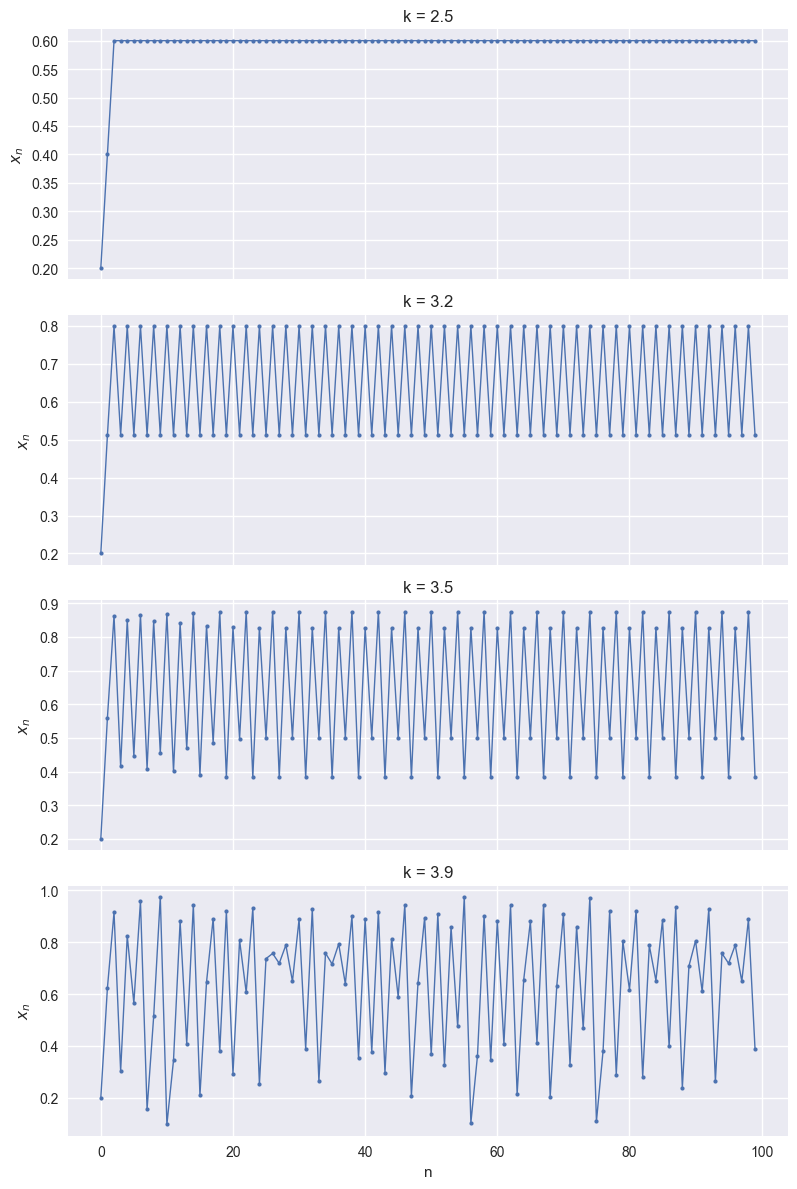

In [5]:
k_values = [2.5, 3.2, 3.5, 3.9]
plot_trajectories_for_k(k_values, x0=0.2, n_iters=100)


Na podstawie powyższych wykresów można zauważyć zmiany w zachowaniu układu w zależności od wartości parametru $k$:

- Dla małych wartości $k$ układ osiąga stabilny punkt stały.
- Wraz ze wzrostem $k$ pojawia się okresowość - zaczyna się oscylowacja między kilkoma wartościami.
- Przy jeszcze większych wartościach $k$ trajektorie stają się nieregularne i chaotyczne.

### Wrażliwość na warunki początkowe w zależności od parametru k

In [9]:
def plot_sensitivity(k, x0, eps=1e-6, n_iters=100):
    """
    Funkcja wizualizuje wrażliwość odwzorowania logistycznego na zmiany warunku początkowego.
    Parametry:
        k - parametr wzrostu, kontrolujący dynamikę układu
        x0 - główny warunek początkowy
        eps - zmiana warunku początkowego
        n_iters - liczba iteracji do wygenerowania ciągu wartości
    """
    x1 = generate_trajectory(k, x0, n_iters)
    x2 = generate_trajectory(k, x0 + eps, n_iters)
    
    plt.figure(figsize=(8, 4))
    plt.plot(x1, label=f"$x_0 = {x0}$")
    plt.plot(x2, '--', label=f"$x_0 = {x0} + \\varepsilon$")
    plt.title(f"Wrażliwość na warunki początkowe (k = {k})")
    plt.xlabel("n")
    plt.ylabel("$x_n$")
    plt.legend()
    plt.grid(True)
    plt.show()


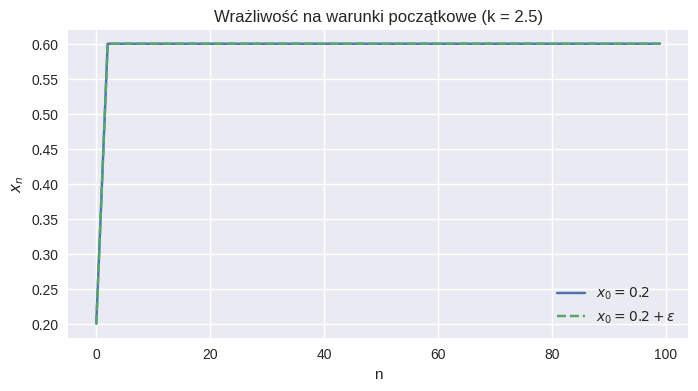

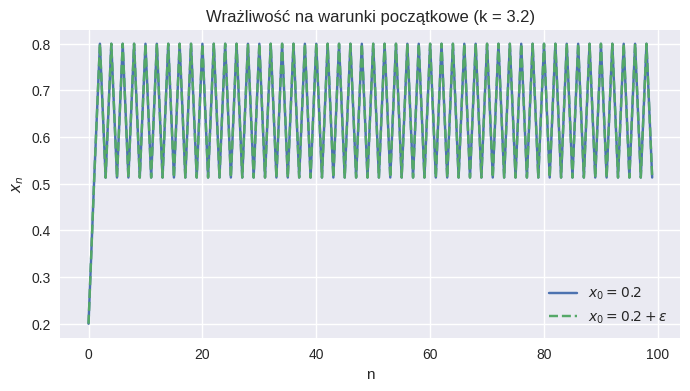

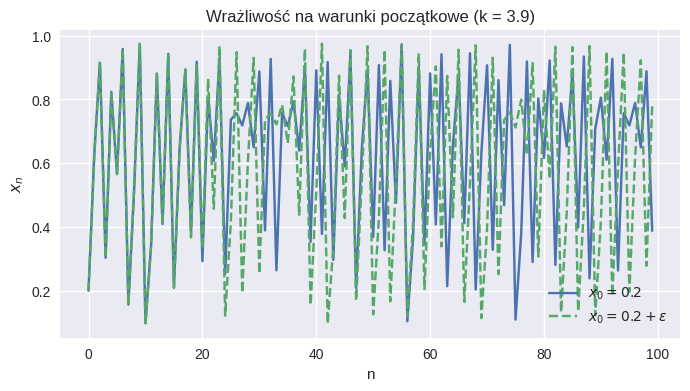

In [9]:
for k in [2.5, 3.2, 3.9]:
    plot_sensitivity(k, x0=0.2, eps=1e-6, n_iters=100)


Na podstawie powyższych wykresów można zauważyć, że dla dwóch bardzo bliskich warunków początkowych zachodzi:

- Dla małych wartości parametru $k$ trajektorie dla różnych warunków początkowych niemal się pokrywają, a układ jest stabilny.
- Wraz ze wzrostem $k$ niewielkie różnice w warunkach początkowych prowadzą do coraz większych rozbieżności w trajektoriach.
- Dla dużych wartości $k$ układ staje się bardzo wrażliwy na warunki początkowe.

Można więc wywnioskować, że w miarę wzrostu parametru $k$ układ przechodzi od stabilności do silnej wrażliwości na warunki początkowe, co jest jedną z cech chaosu deterministycznego.


# Wykres bifurkacyjny

Wykres bifurkacyjny pokazuje, jak zachowanie odwzorowania logistycznego zmienia się w zależności od parametru $k$.  

Dzięki niemu można zobaczyć, kiedy układ jest stabilny, kiedy oscyluje w sposób okresowy, a kiedy staje się chaotyczny. Wykres pozwala też zauważyć samopodobną, fraktalną strukturę układu.

Aby go stworzyć, dla każdej wartości $k$ iterujemy układ, odrzucamy początkową część trajektorii (część przejściową), a następnie rysujemy pozostałe wartości jako punkty na wykresie.

### Podstawowy wykres bifurkacyjny

In [10]:
def bifurcation_diagram(
    k_min=2.5,
    k_max=4.0,
    k_steps=5000,
    x0=0.2,
    n_iters=1000,
    n_discard=500
):
    """
    Funkcja generuje dane potrzebne do stworzenia wykresu bifurkacyjnego odwzorowania logistycznego.
    Parametry:
        k_min - minimalna wartość parametru k
        k_max - maksymalna wartość parametru k
        k_steps - liczba kroków w przedziale [k_min, k_max]
        x0 - warunek początkowy
        n_iters - liczba iteracji wykonywanych dla każdego k
        n_discard - liczba początkowych iteracji odrzucanych
    """
    k_values = np.linspace(k_min, k_max, k_steps)
    
    ks = []
    xs = []
    
    for k in k_values:
        x = x0
        for i in range(n_iters):
            x = logistic_map(x, k)
            if i >= n_discard:
                ks.append(k)
                xs.append(x)
    
    return np.array(ks), np.array(xs)


In [9]:
def plot_bifurcation(ks, xs, title="Wykres bifurkacyjny"):
    plt.figure(figsize=(10, 6))
    plt.plot(ks, xs, ',k', alpha=0.25)
    plt.xlabel("k")
    plt.ylabel("x")
    plt.title(title)
    plt.tight_layout()
    plt.show()

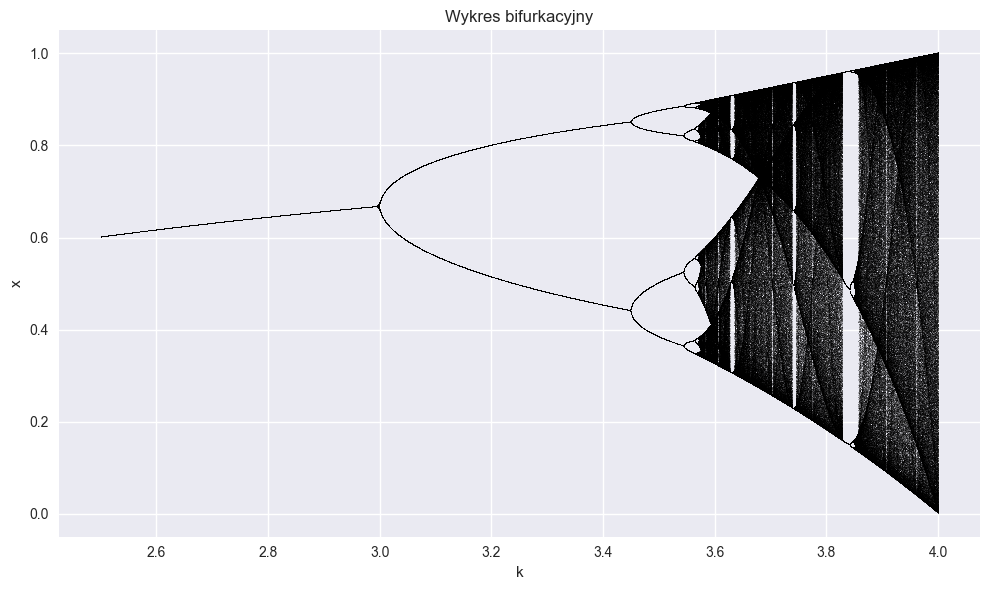

In [10]:
ks, xs = bifurcation_diagram(
    k_min=2.5,
    k_max=4.0,
    k_steps=6000,
    x0=0.2,
    n_iters=1200,
    n_discard=600
)

plot_bifurcation(ks, xs)


Z powyższego wykresu bifurkacyjnego odwzorowania logistycznego można wyciągnąć następujące wnioski:

- Dla $k<3$: układ osiąga stabilny punkt stały
- Dla $3<k<3.57$: pojawiają się okresowe oscylacje - podwajanie okresu.
- Dla $k>3.57$: zachowanie staje się nieregularne i chaotyczne.
- W niektórych zakresach $k$ mogą pojawiać się krótkie okna periodyczne wewnątrz chaosu.
- Ogólnie, wykres bifurkacyjny obrazuje drogę układu od stabilności, przez okresowość, aż do chaosu deterministycznego.

### Wpływ warunków początkowych na strukturę wykresu bifurkacyjnego

In [15]:
def plot_bifurcation_for_x0(
    x0_values,
    k_min=2.5,
    k_max=4.0,
    k_steps=4000,
    n_iters=1000,
    n_discard=500
):
    """
    Funkcja rysuje wykresy bifurkacyjne odwzorowania logistycznego dla różnych warunków początkowych x0.
    Parametry:
        x0_values - tablica warunków początkowych
        k_min - minimalna wartość parametru k
        k_max - maksymalna wartość parametru k
        k_steps - liczba kroków w przedziale [k_min, k_max]
        n_iters - liczba iteracji wykonywanych dla każdego k
        n_discard - liczba początkowych iteracji odrzucanych
    """
    fig, axes = plt.subplots(
        len(x0_values), 1,
        figsize=(10, 3 * len(x0_values)),
        sharex=True
    )
    
    if len(x0_values) == 1:
        axes = [axes]
    
    for ax, x0 in zip(axes, x0_values):
        ks, xs = bifurcation_diagram(
            k_min=k_min,
            k_max=k_max,
            k_steps=k_steps,
            x0=x0,
            n_iters=n_iters,
            n_discard=n_discard
        )
        
        ax.plot(ks, xs, ',k', alpha=0.25)
        ax.set_ylabel("x")
        ax.set_title(f"Wykres bifurkacyjny dla $x_0 = {x0}$")
        ax.grid(False)
    
    axes[-1].set_xlabel("k")
    plt.tight_layout()
    plt.show()


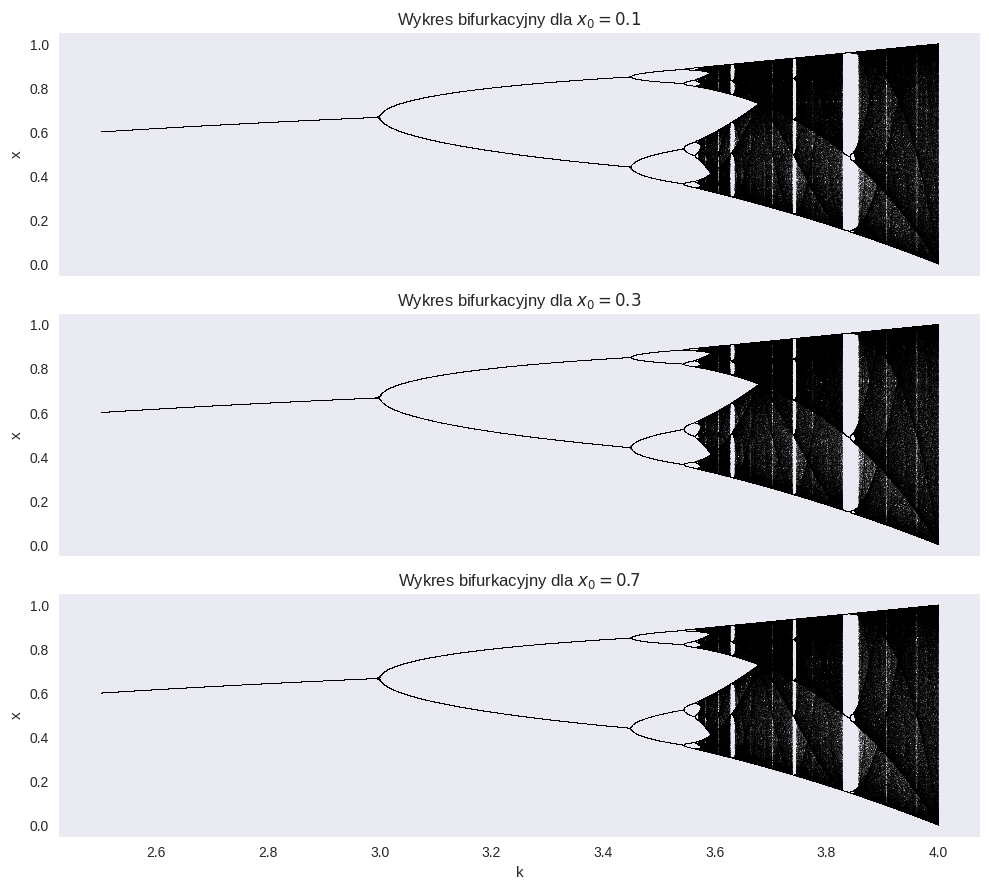

In [16]:
x0_values = [0.1, 0.3, 0.7]

plot_bifurcation_for_x0(
    x0_values,
    k_steps=5000
)


Analiza powyższych wykresów bifurkacyjnych dla różnych warunków początkowych $x_0$ pozwala wyciągnąć następujące wnioski:

- Ogólna struktura wykresu bifurkacyjnego nie zależy od warunku początkowego - przebieg podwajania okresu i występowanie chaosu pozostaje taki sam.
- Bifurkacja i pojawianie się chaosu deterministycznego jest własnością układu, niezależną od konkretnego stanu początkowego.

# Wykładnik Lapunowa

Wykładnik Lapunowa jest miarą opisującą, jak szybko dwie początkowo bliskie trajektorie układu dynamicznego rozchodzą się w czasie.  

Dla odwzorowania logistycznego można go obliczyć ze wzoru:

$$
\lambda = \lim_{N \to \infty} \frac{1}{N} \sum_{n=1}^N \ln |k (1 - 2 x_n)|
$$

Interpretacja wykładnika Lapunowa jest następująca:

- $\lambda < 0$: trajektorie zbliżają się do siebie - układ jest stabilny.
- $\lambda = 0$: układ znajduje się w punkcie przejściowym - np. przy bifurkacji.
- $\lambda > 0$: trajektorie rozchodzą się w sposób wykładniczy - układ jest chaotyczny.

Wykładnik Lapunowa pozwala ocenić, czy zachowanie układu jest stabilne, okresowe, czy chaotyczne.


In [17]:
def lyapunov_exponent(
    k,
    x0=0.2,
    n_iters=1000,
    n_discard=100
):
    """
    Funkcja oblicza wykładnik Lapunowa dla odwzorowania logistycznego.
    Parametry:
        k - parametr wzrostu, kontrolujący dynamikę układu
        x0 - warunek początkowy
        n_iters - liczba iteracji
        n_discard - liczba początkowych, odrzucanych iteracji
    """
    x = x0
    lyap_sum = 0.0
    count = 0
    
    for i in range(n_iters):
        x = logistic_map(x, k)
        if i >= n_discard:
            lyap_sum += np.log(abs(k * (1 - 2 * x)))
            count += 1
            
    return lyap_sum / count


In [18]:
def lyapunov_vs_k(
    k_min=2.5,
    k_max=4.0,
    k_steps=2000,
    x0=0.2
):
    """
    Funkcja oblicza wykładnik Lapunowa dla odwzorowania logistycznego dla wielu wartości parametru k.
    Parametry:
        k_min - minimalna wartość parametru k
        k_max - maksymalna wartość parametru k
        k_steps - liczba kroków w przedziale [k_min, k_max]
        x0 - warunek początkowy
    """
    k_values = np.linspace(k_min, k_max, k_steps)
    lyap_values = np.array([
        lyapunov_exponent(k, x0) for k in k_values
    ])
    
    return k_values, lyap_values


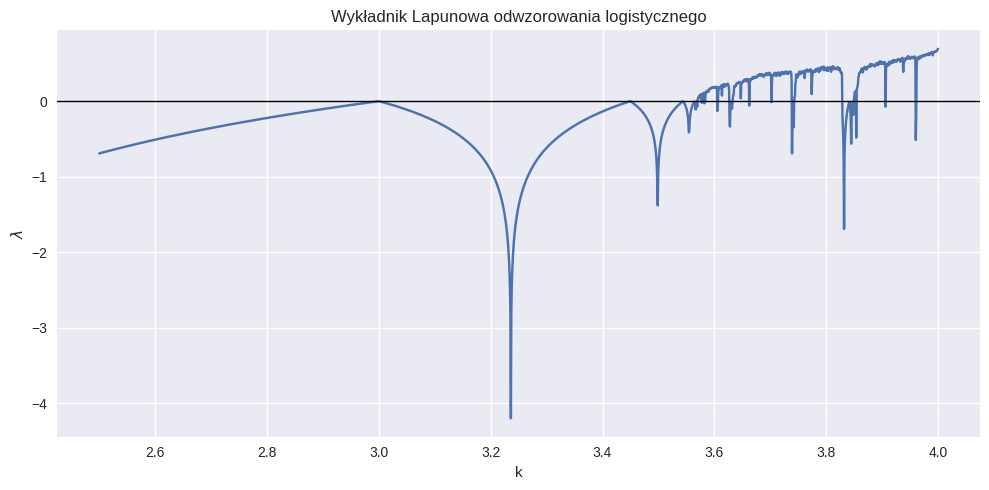

In [19]:
k_vals, lyap_vals = lyapunov_vs_k()

plt.figure(figsize=(10, 5))
plt.plot(k_vals, lyap_vals)
plt.axhline(0, color='black', lw=1)
plt.xlabel("k")
plt.ylabel(r"$\lambda$")
plt.title("Wykładnik Lapunowa odwzorowania logistycznego")
plt.grid(True)
plt.tight_layout()
plt.show()


### Wykres bifurkacyjny a wykładnik Lapunowa

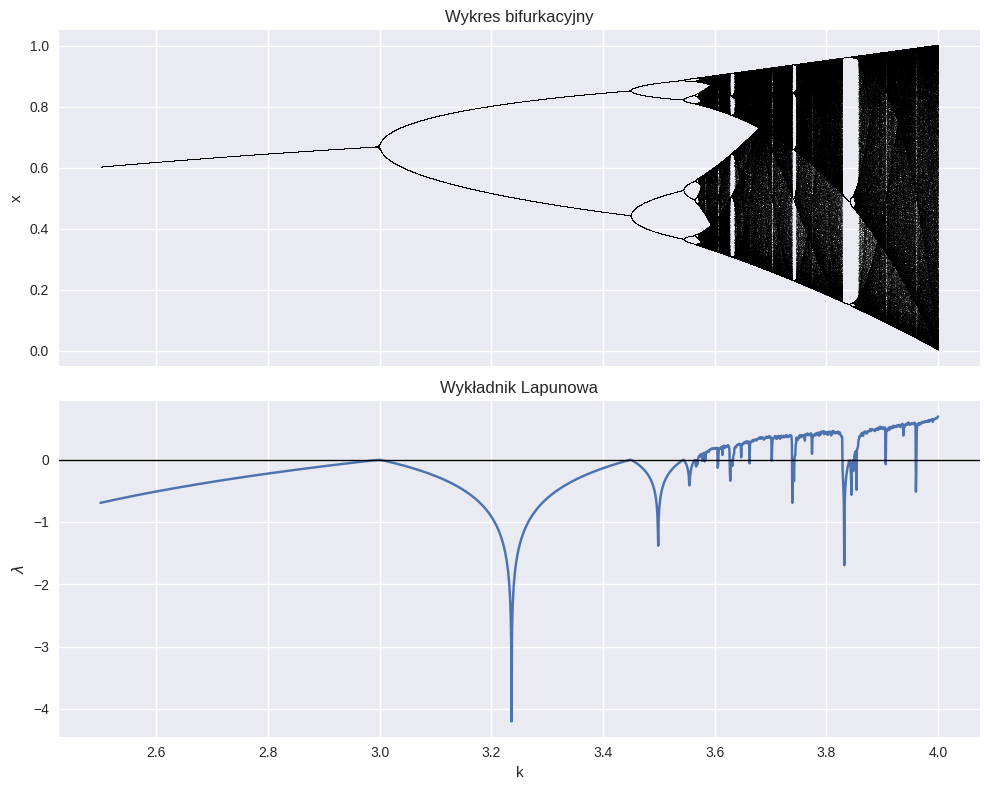

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Bifurkacja
axes[0].plot(ks, xs, ',k', alpha=0.25)
axes[0].set_ylabel("x")
axes[0].set_title("Wykres bifurkacyjny")

# Lapunow
axes[1].plot(k_vals, lyap_vals)
axes[1].axhline(0, color='black', lw=1)
axes[1].set_xlabel("k")
axes[1].set_ylabel(r"$\lambda$")
axes[1].set_title("Wykładnik Lapunowa")

plt.tight_layout()
plt.show()


Na podstawie powyższych wykresów można zauważyć, że w układach chaotycznych lokalnie $\lambda$ może spadać poniżej 0, jednak w długim czasie średnia pozostaje dodatnia, co świadczy o chaosie deterministycznym.

## Obliczanie wymiaru Mińkowskiego

W celu ilościowej charakterystyki struktury geometrycznej chaotycznej części wykresu bifurkacyjnego przeprowadzamy analizę wymiaru Minkowskiego (box-dimesion). Analizę ograniczono do parametru k w przedziale [3.57, 4], aby pokrywała ona tylko chaotyczny fragment wykresu, w którym zbiór punktów wykazuje nieregularną, samopodobną strukturę.

In [14]:
def select_chaotic_region(ks, xs, k_min=3.57, k_max=4.0):
    mask = (ks >= k_min) & (ks <= k_max)
    return ks[mask], xs[mask]


In [ ]:
def box_counting_dimension(ks, xs, epsilons):
    """
    Oblicza liczbę zajętych pudełek dla różnych epsilonów
    """
    counts = []

    k_norm = (ks - ks.min()) / (ks.max() - ks.min())
    x_norm = (xs - xs.min()) / (xs.max() - xs.min())

    for eps in epsilons:
        bins = int(1 / eps)

        k_idx = (k_norm * bins).astype(int)
        x_idx = (x_norm * bins).astype(int)

        boxes = set(zip(k_idx, x_idx))
        counts.append(len(boxes))

    return np.array(counts)


In [17]:
def compute_minkowski_dimension(ks, xs):
    epsilons = np.logspace(-3, -1, 15)

    N_eps = box_counting_dimension(ks, xs, epsilons)

    log_eps = np.log(1 / epsilons)
    log_N = np.log(N_eps)

    # dopasowanie prostej
    coeffs = np.polyfit(log_eps, log_N, 1)
    D = coeffs[0]

    return D, log_eps, log_N


Wymiar Minkowskiego: D ≈ 1.877


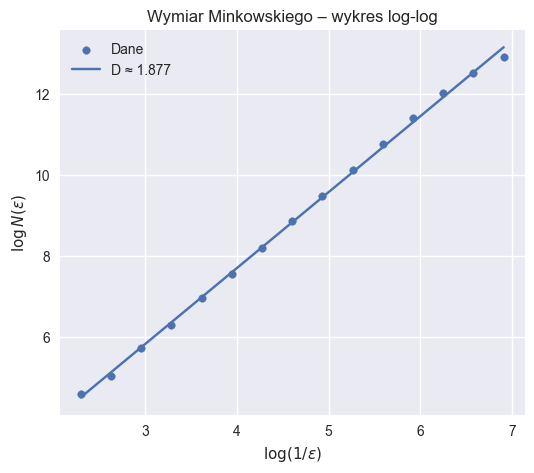

In [19]:
ks, xs = bifurcation_diagram(
    k_min=2.5,
    k_max=4.0,
    k_steps=6000,
    x0=0.2,
    n_iters=1200,
    n_discard=600
)
# wybór obszaru chaotycznego
ks_ch, xs_ch = select_chaotic_region(ks, xs, 3.57, 4.0)

# obliczenie wymiaru
D, log_eps, log_N = compute_minkowski_dimension(ks_ch, xs_ch)

print(f"Wymiar Minkowskiego: D ≈ {D:.3f}")
plt.figure(figsize=(6, 5))
plt.scatter(log_eps, log_N, s=30, label="Dane")

# linia dopasowania
fit = np.polyfit(log_eps, log_N, 1)
plt.plot(log_eps, np.polyval(fit, log_eps),
         label=f"D ≈ {fit[0]:.3f}")

plt.xlabel(r"$\log(1/\varepsilon)$")
plt.ylabel(r"$\log N(\varepsilon)$")
plt.title("Wymiar Minkowskiego – wykres log-log")
plt.legend()
plt.grid(True)
plt.show()


## Porównanie wymiaru boxowego dla różnych wartości początkowych

Poniższy wykres porównuje wymiar mińkowskiego i wykresy dla 3 różnych wartości x0 = 0.2, 0.6, 0.8. Wymiar dla każdego z nich jest dokładnie taki sam. Wnioskujemy zatem, że wymiar boxowy nie zależy od warunków początkowych

x0 = 0.2 → D ≈ 1.877
x0 = 0.6 → D ≈ 1.877
x0 = 0.8 → D ≈ 1.877


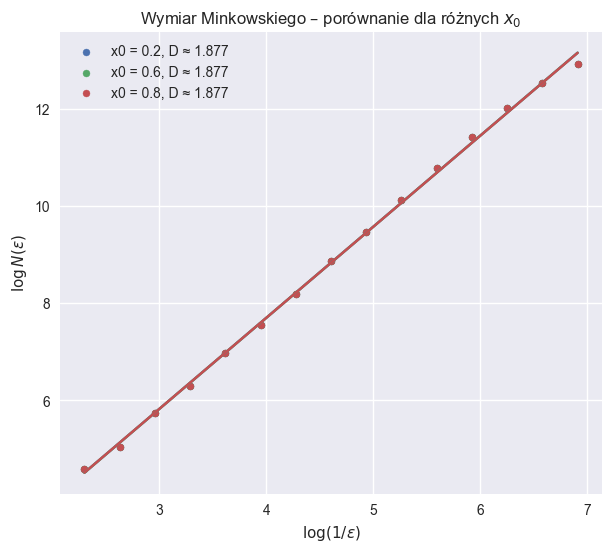

In [21]:
x0_values = [0.2, 0.6, 0.8]

plt.figure(figsize=(7, 6))

for x0 in x0_values:
    # bifurkacja
    ks, xs = bifurcation_diagram(
        k_min=2.5,
        k_max=4.0,
        k_steps=6000,
        x0=x0,
        n_iters=1200,
        n_discard=600
    )

    # obszar chaotyczny
    ks_ch, xs_ch = select_chaotic_region(ks, xs, 3.57, 4.0)

    # wymiar Minkowskiego
    D, log_eps, log_N = compute_minkowski_dimension(ks_ch, xs_ch)

    print(f"x0 = {x0:.1f} → D ≈ {D:.3f}")

    # punkty log–log
    plt.scatter(
        log_eps,
        log_N,
        s=25,
        label=f"x0 = {x0}, D ≈ {D:.3f}"
    )

    # linia dopasowania
    fit = np.polyfit(log_eps, log_N, 1)
    plt.plot(
        log_eps,
        np.polyval(fit, log_eps)
    )

plt.xlabel(r"$\log(1/\varepsilon)$")
plt.ylabel(r"$\log N(\varepsilon)$")
plt.title("Wymiar Minkowskiego – porównanie dla różnych $x_0$")
plt.legend()
plt.grid(True)
plt.show()


# Bibliografia

- https://pl.wikipedia.org/wiki/Odwzorowanie_logistyczne
- https://pl.wikipedia.org/wiki/Bifurkacja_(matematyka)
- https://pl.wikipedia.org/wiki/Wyk%C5%82adnik_Lapunowa